In [1]:
#Clean data
import pandas as pd 
data =pd.read_csv('https://raw.githubusercontent.com/npnkhoi/github-data-analysis/main/2k_random_repos.csv')
data.drop(data.columns[[0]], axis=1, inplace=True)
data.columns = ['full_name','num_stars','num_forks', 'num_stars1', 'main_language', 'created_at','updated_at','license_key','description','num_open_issues','topics']
data = data.drop(columns = ['num_stars1'])
print(data.head(n=10))

                               full_name  num_stars  num_forks main_language  \
0              recloudstream/cloudstream       1623        126        Kotlin   
1                  ProjectPhysX/FluidX3D       1041         98           C++   
2                       serhack/pdf-diff        695         33            Go   
3                7eu7d7/pixiv_AI_crawler        375         25        Python   
4  pratikratadiya/awesome-ml-internships        357         36           NaN   
5    amazon-science/alexa-teacher-models        282         13           NaN   
6            microsoft/oss-ssc-framework        224          9           NaN   
7          lahoud/3d-vision-transformers        219         17           NaN   
8                m1911star/affine-client        215          8          Rust   
9                carr0t2/nps-auth-bypass        198         26        Python   

             created_at            updated_at license_key  \
0  2022-08-04T08:42:38Z  2022-12-03T23:06:29Z     gpl-3.0 

In [ ]:
df1 = data.sort_values('num_stars')
df1 = data.sort_values('num_stars')


In [2]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
print('num_stars:',shapiro(data['num_stars']))
print('num_forks:',shapiro(data['num_forks']))
print('num_open_issues:',shapiro(data['num_open_issues']))


num_stars: ShapiroResult(statistic=0.11322695016860962, pvalue=0.0)
num_forks: ShapiroResult(statistic=0.08698022365570068, pvalue=0.0)
num_open_issues: ShapiroResult(statistic=0.03006070852279663, pvalue=0.0)


#ANOVA Hypothesis testing

In [3]:
#Clean data
for i in range(0,len(data['main_language']),1):
  if data['main_language'][i] in ['Python', 'JavaScript', 'Ruby', 'Java', 'C++']:
    continue
  else:
    data['main_language'][i]="Others"

for i in range(0,len(data['license_key']),1):
  if data['license_key'][i] in ['mit', 'apache-2.0', 'gpl-3.0', 'gpl-2.0']:
    continue
  else:
    data['license_key'][i]="Others"
data2 = data.loc[data['main_language'] != 'Others']
data2= data2.iloc[:,[1,3,6]].dropna()

/var/folders/9j/05g0fs4s4x1978v1rd_b5_ch0000gn/T/ipykernel_9088/2180628420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['main_language'][i]="Others"
/var/folders/9j/05g0fs4s4x1978v1rd_b5_ch0000gn/T/ipykernel_9088/2180628420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['license_key'][i]="Others"


In [5]:
#ANOVA Two way hypothesis testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'num_stars ~ (main_language) + (license_key) + (license_key):(main_language)'
model = ols(formula, data2).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                                 sum_sq     df         F    PR(>F)
main_language              1.117682e+07    4.0  2.341287  0.053401
license_key                2.305535e+07    4.0  4.829568  0.000738
license_key:main_language  3.256269e+07   16.0  1.705284  0.040466
Residual                   1.103939e+09  925.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
C++,Java,120.4738,0.9,-928.3,1169.2476,False
C++,JavaScript,418.0988,0.6964,-499.2398,1335.4373,False
C++,Python,48.1174,0.9,-838.5251,934.76,False
C++,Ruby,-200.8152,0.9,-1138.0594,736.429,False
Java,JavaScript,297.625,0.879,-582.8575,1178.1075,False
Java,Python,-72.3563,0.9,-920.8105,776.0978,False
Java,Ruby,-321.289,0.8504,-1222.4915,579.9136,False
JavaScript,Python,-369.9813,0.5585,-1049.2883,309.3257,False
JavaScript,Ruby,-618.914,0.1537,-1363.0575,125.2296,False
Python,Ruby,-248.9326,0.8564,-954.8892,457.0239,False


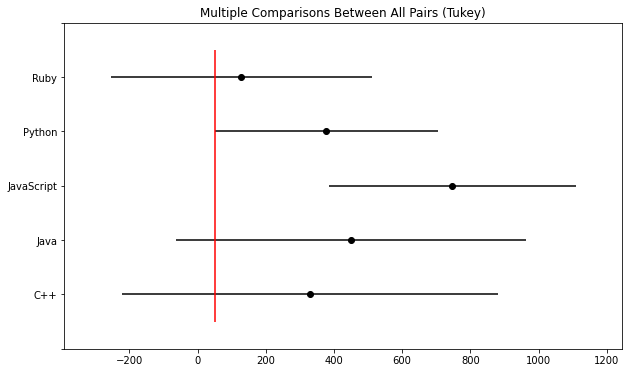

In [ ]:
#Turkey test for 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
tukey = pairwise_tukeyhsd(endog=data2['num_stars'],     # Data
                          groups=data2['main_language'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()          

group1,group2,meandiff,p-adj,lower,upper,reject
apache-2.0,gpl-2.0,-80.7337,0.9,-1198.4583,1036.991,False
apache-2.0,gpl-3.0,85.9607,0.9,-886.4996,1058.421,False
apache-2.0,mit,157.8303,0.9,-510.3923,826.0528,False
gpl-2.0,gpl-3.0,166.6944,0.9,-1044.7271,1378.1159,False
gpl-2.0,mit,238.564,0.9,-745.5012,1222.6292,False
gpl-3.0,mit,71.8696,0.9,-743.4555,887.1946,False


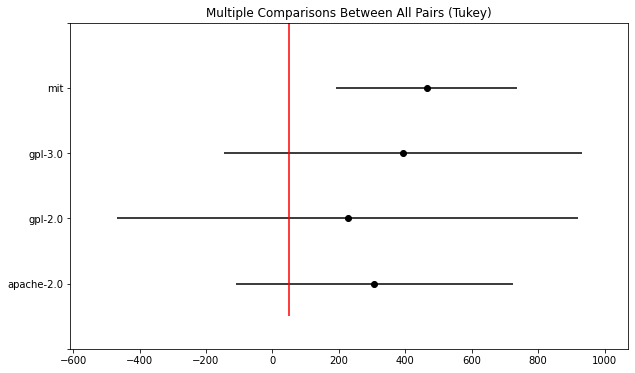

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
tukey = pairwise_tukeyhsd(endog=data2['num_stars'],     # Data
                          groups=data2['license_key'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()    

#Descriptive analysis

In [ ]:
data.describe()

,num_stars,num_forks,num_open_issues
count,1993.000000,1993.000000,1993.000000
mean,279.110888,73.470647,17.068741
std,1636.886047,517.645541,241.766542
min,1.000000,0.000000,0.000000
25%,10.000000,2.000000,0.000000
50%,57.000000,11.000000,1.000000
75%,153.000000,38.000000,6.000000
max,53545.000000,19281.000000,10441.000000


In [ ]:
df1 = data['main_language'].value_counts()[:10]


In [ ]:
import statistics as st
import numpy as np
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(data['num_open_issues'])-1, loc=np.mean(data['num_open_issues']), scale=st.sem(data['num_open_issues'])) 


(6.448004888754323, 27.689476295390183)

In [ ]:
pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 6.6 MB/s 
     |████████████████████████████████| 99 kB 7.2 MB/s 


In [ ]:
import pandas as pd
import os





In [ ]:
data2 = data.drop(columns=['full_name','num_stars','num_forks','created_at','updated_at','license_key','num_open_issues'], axis=1)
data2= data2.dropna()
print(data2)

     main_language                                        description  \
0           Kotlin  Android app for streaming and downloading Movi...   
1              C++  The fastest and most memory efficient lattice ...   
2               Go  A tool for visualizing differences between two...   
9           Python  nps认证绕过利用工具，使用此工具可在浏览器访问web控制端后台页面，或者批量获取socks...   
12              Go  A tool for showing disk usage. (Linux, MacOS a...   
...            ...                                                ...   
1985        Kotlin     A polyfill to use WebAssembly in React Native.   
1986          SCSS     A compact, better looking, top-left user area.   
1987             R  By-hand code for models and algorithms. An upd...   
1989    TypeScript  Plugin for Obsidian: Use shortcuts for input s...   
1990        Python  Networked DFing software that can handle multi...   

                                                 topics  
0     android, anime, media-center, streaming-app, v...  
1     c

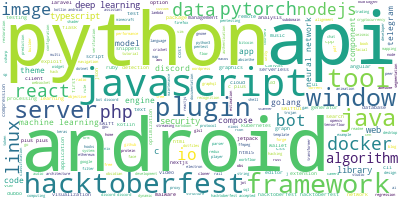

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data2['description'].values)) + ','.join(list(data2['topics'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data_here1 = data2['description'].tolist()
data_here2 = data2['topics'].tolist()
data_words = list(sent_to_words(data_here1+data_here2))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['android', 'app', 'streaming', 'downloading', 'movies', 'tv', 'series', 'anime']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:100])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
from pprint import pprint


In [ ]:
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
pip install pyLDAvis

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


In [ ]:
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/datalab'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/datalab'+ str(num_topics) +'.html')
LDAvis_prepared


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.021691 -0.153860       1        1  11.486440
6      0.150725 -0.025975       2        1  11.482078
3     -0.094506 -0.032539       3        1  11.388368
7     -0.043274  0.076235       4        1  11.369905
8     -0.090213  0.022227       5        1  10.500148
4      0.003407  0.118766       6        1   9.783442
0     -0.053451 -0.005571       7        1   9.287149
2      0.085450  0.034429       8        1   9.052723
1      0.023425 -0.030843       9        1   8.769484
5      0.040127 -0.002868      10        1   6.880263, topic_info=               Term       Freq      Total Category  logprob  loglift
674        learning  31.000000  31.000000  Default  30.0000  30.0000
1401  hacktoberfest  35.000000  35.000000  Default  29.0000  29.0000
0           android  43.000000  43.000000  Default  28.0000  28.0000
1047           deep  14.000000  14.000000  Default  27.0000  27.0000
81          discord  19.000000  19.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
515      javascript   1.341454  16.953874  Topic10  -5.7477   0.1398
66           neural   1.341451   7.666086  Topic10  -5.7477   0.9335
357           tools   1.341451  10.468619  Topic10  -5.7477   0.6219
30            macos   1.341448   7.760657  Topic10  -5.7477   0.9212
237          simple   1.341443   9.168053  Topic10  -5.7477   0.7545

[649 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
111       2  0.665073       absinthe
111       4  0.221691       absinthe
2189      4  0.470218           adam
2060      6  0.472198        adblock
826       1  0.242339    adversarial
...     ...       ...            ...
1299      8  0.704418             应用
1300      8  0.704418             开发
1301      8  0.704418             提供
1302      8  0.704418  有声资源和播放器由喜马拉雅
1303      8  0.704418            界面的

[1201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 4, 8, 9, 5, 1, 3, 2, 6])

#Draw data histogram

In [ ]:
pip install plotnine


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotnine.data import mpg
from plotnine import ggplot
from plotnine import ggplot, aes, stat_bin, geom_bar,labs
import numpy as np
import pandas as pd

import plotnine

from plotnine import *
from plotnine import data
from pandas import DataFrame

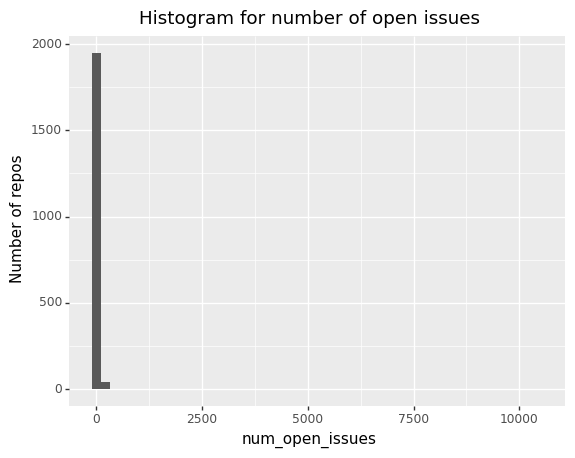

<ggplot: (8763038921198)>

In [ ]:
ggplot(df1) + aes(x="num_open_issues") + stat_bin(bins=50) + geom_bar()+labs(title="Histogram for number of open issues", y="Number of repos")


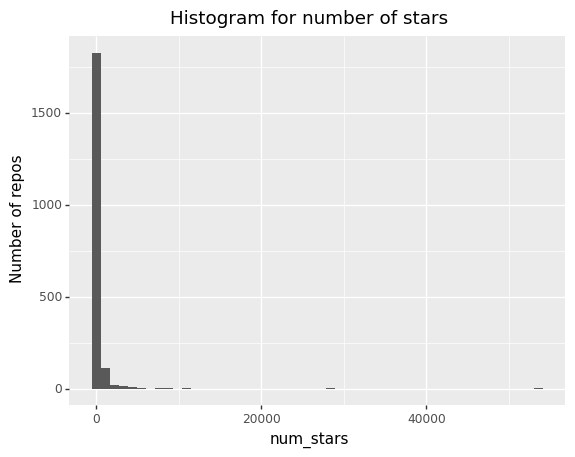

<ggplot: (8783508756176)>

In [ ]:
ggplot(df1) + aes(x="num_stars") + stat_bin(bins=50) + geom_bar()+labs(title="Histogram for number of stars", y="Number of repos")


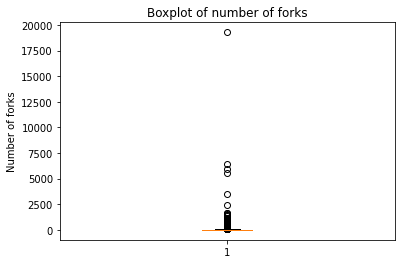

In [41]:
fork = data['num_forks']
# Import libraries
import matplotlib.pyplot as plt
# Creating plot
plt.boxplot(fork)
plt.ylabel('Number of forks')
plt.title("Boxplot of number of forks")
# show plot
plt.show()

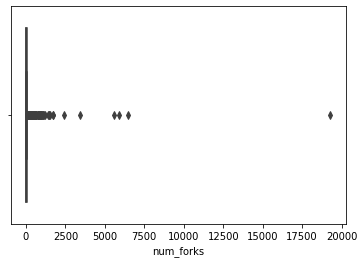

In [21]:
sns.boxplot(x=data["num_forks"])


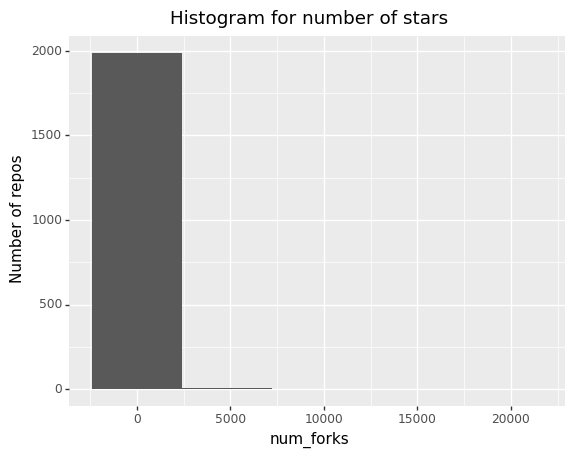

<ggplot: (8783511881861)>

In [ ]:
ggplot(data) + aes(x="num_forks") + stat_bin(bins=5) + geom_bar()+labs(title="Histogram for number of stars", y="Number of repos")


#Research question 3

                                full_name  num_stars  num_forks  \
0               recloudstream/cloudstream       1623        126   
1                   ProjectPhysX/FluidX3D       1041         98   
2                        serhack/pdf-diff        695         33   
9                 carr0t2/nps-auth-bypass        198         26   
12                     chenquan/diskusage        176          3   
14  lucidrains/flash-cosine-sim-attention        171          7   
15                    SerenaKit/Santander        162         27   
16                           lh3/miniprot        151          3   
19         apple/batch-processing-gateway        119         22   
20                  thufv/CMinor-Verifier        119         11   

    num_open_issues main_language            created_at            updated_at  \
0              1623        Kotlin  2022-08-04T08:42:38Z  2022-12-03T23:06:29Z   
1              1041           C++  2022-08-04T08:49:44Z  2022-12-03T23:27:17Z   
2               695

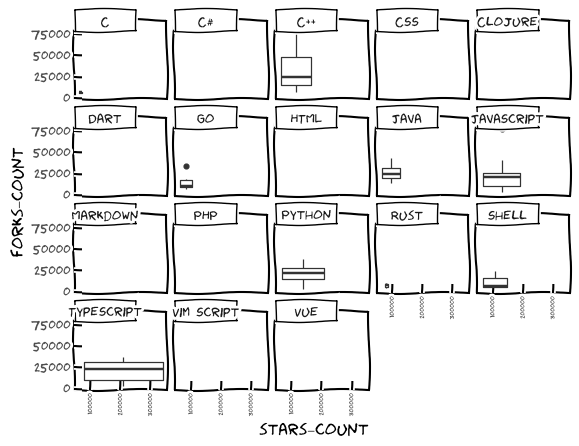

<ggplot: (8726730964453)>

In [ ]:
ggplot(data, aes(x='stars_count', y='forks_count')) + \
    geom_boxplot() + \
    facet_wrap(['main_language']) + \
    theme_xkcd() + \
    theme(axis_text_x = element_text(size=5, angle=90, hjust=2))

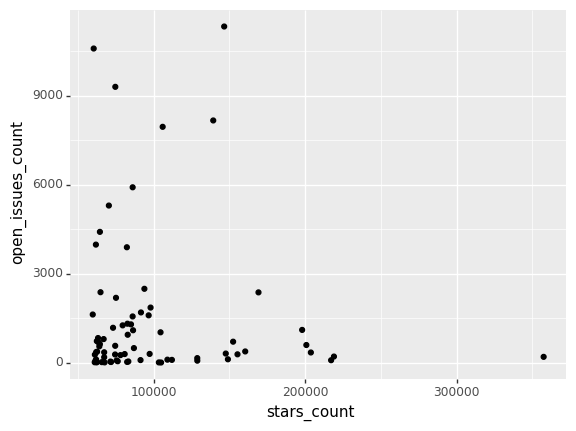

<ggplot: (8726730809349)>

In [ ]:
ggplot(data, aes(x='stars_count', y='open_issues_count')) + geom_point()


In [ ]:
ggplot(data, aes(x='year')) + \
    geom_bar(stat = 'count')


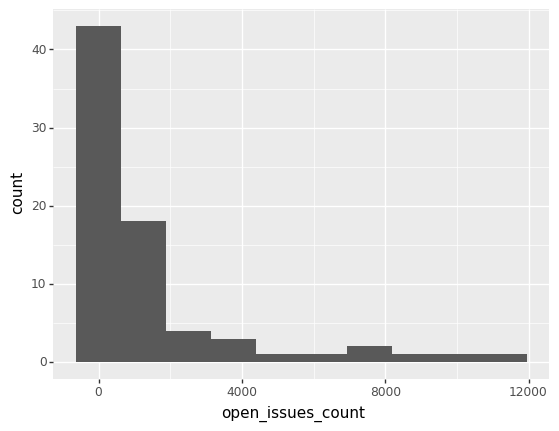

<ggplot: (8726734626677)>

In [ ]:
ggplot(data) + aes(x="open_issues_count") + stat_bin(bins=10) + geom_bar()



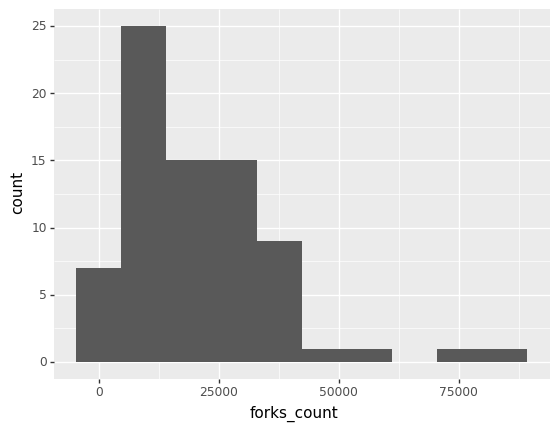

<ggplot: (8726734401741)>

In [ ]:
ggplot(data) + aes(x="forks_count") + stat_bin(bins=10) + geom_bar()

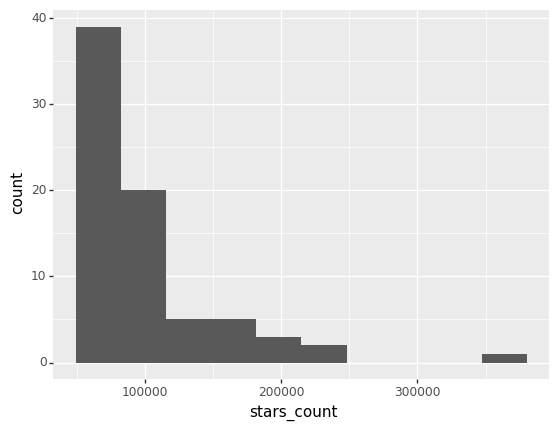

<ggplot: (8726734684237)>

In [ ]:
ggplot(data) + aes(x="stars_count") + stat_bin(bins=10) + geom_bar()


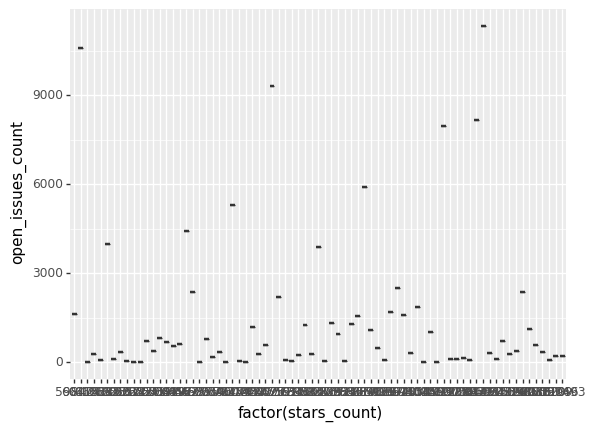

<ggplot: (8726734813097)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(data)
  + aes(x="factor(stars_count)", y="open_issues_count")
  + geom_boxplot()
)

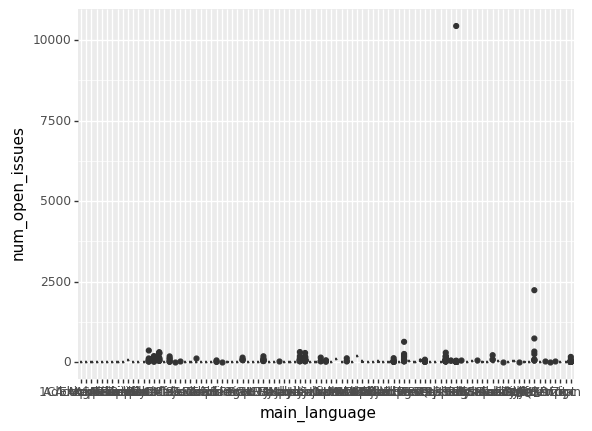

<ggplot: (8731945799677)>

In [22]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(data)
  + aes(x="main_language", y="num_open_issues")
  + geom_boxplot(width = 0.4,shape=23,notchwidth = 10,alpha=0.3)
)

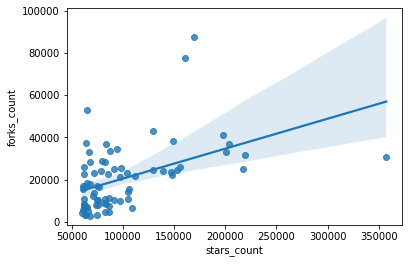

In [ ]:
sns.regplot(x="stars_count", y="forks_count", data=data);


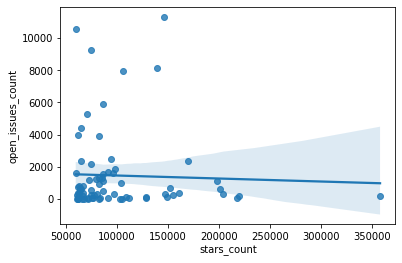

In [ ]:
sns.regplot(x="stars_count", y="open_issues_count", data=data);

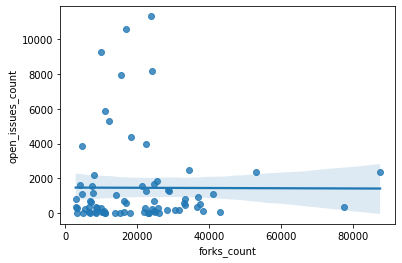

In [ ]:
sns.regplot(x="forks_count", y="open_issues_count", data=data);

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/npnkhoi/github-data-analysis/main/500_repos.csv").dropna()
data.head()

,Unnamed: 0,full_name,num_stars,num_forks,num_watchers,num_open_issues,topics,main_language,created_at,updated_at,license_key
0,0,freeCodeCamp/freeCodeCamp,357821,30534,357821,185,"careers, certification, community, curriculum,...",TypeScript,2014-12-24T17:49:19Z,2022-12-02T09:09:42Z,bsd-3-clause
5,5,kamranahmedse/developer-roadmap,220033,31828,220033,238,"angular-roadmap, backend-roadmap, blockchain-r...",TypeScript,2017-03-15T13:45:52Z,2022-12-02T10:03:16Z,other
6,6,public-apis/public-apis,218700,25013,218700,85,"api, apis, dataset, development, free, list, l...",Python,2016-03-20T23:49:42Z,2022-12-02T09:36:01Z,mit
7,7,donnemartin/system-design-primer,204600,36819,204600,338,"design, design-patterns, design-system, develo...",Python,2017-02-26T16:15:28Z,2022-12-02T10:04:46Z,other
8,8,vuejs/vue,201027,33114,201027,592,"framework, frontend, javascript, vue",TypeScript,2013-07-29T03:24:51Z,2022-12-02T10:00:35Z,mit
